## This Jupyter notebook will show you to perform basic calculations and plots with 2 dimensional data

## We will compare four images, each corresponding to the mean Chl-a for each season of the year between 1998 and 2020:
### * Winter - January to March
### * Spring - April to June
### * Summer - July to September
### * Autumn - October to December

Now, we will need to import several modules/libraries that are essential for nearly every scientific work in Python.

In [4]:
import os #change folders
import numpy as np # perform calculations and basic math
import matplotlib.pyplot as plt # plot data
import pandas as pd # work with dataframes,tables, spreadsheets, etc.
import netCDF4 as nc4 # work with netcdf files, the standard file for satellite 2D and 3D data
import cartopy #work with geographical projections and maps

## Now, lets load each image using the netCDF4 module.

In [5]:
# Let's open the first image
file = 'chl_winter_19982020.nc' #write the name of the file
chl_winter19982020 = nc4.Dataset(file, mode='r') #open the file in python
print(chl_winter19982020) #print full details of the image

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: This is a netCDF4 file containing 2D Chl-a for the Marine Primary Production class
    dimensions(sizes): latitude(216), longitude(216)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 Chl-a(latitude,longitude)
    groups: 


C:\Users\afons\AppData\Local\Temp/ipykernel_7144/860435117.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(chl_winter19982020) #print full details of the image


In [6]:
# You can also use fh.variables to read information only on the variables
print(chl_winter19982020.variables)

{'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees N
unlimited dimensions: 
current shape = (216,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees E
unlimited dimensions: 
current shape = (216,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'Chl-a': <class 'netCDF4._netCDF4.Variable'>
float32 Chl-a(latitude, longitude)
    units: miligrams per cubic meter
unlimited dimensions: 
current shape = (216, 216)
filling on, default _FillValue of 9.969209968386869e+36 used}


C:\Users\afons\AppData\Local\Temp/ipykernel_7144/4010706280.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(chl_winter19982020.variables)


## Notice that you have the following variables:
### * Latitude (degrees N - 1 dimensional)
### * Longitude (degrees E - 1 dimensional)
### * Chl-a (miligrams per cubic meter; mg/m3 - 2 dimensional)

The structure of the netCDF file may change with the product and the creater of the product. For instance:
* L2 and L3 images have different structures
* Satellite images from ESA and NASA also have different structures

It's important to pay attention to the content of a netcdf file before working with the data.

In [7]:
# Extracting variables
lon = np.array(chl_winter19982020['longitude'])
lat = np.array(chl_winter19982020['latitude'])
chl_winter = np.array(chl_winter19982020['Chl-a'])

C:\Users\afons\AppData\Local\Temp/ipykernel_7144/465763094.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = np.array(chl_winter19982020['longitude'])
C:\Users\afons\AppData\Local\Temp/ipykernel_7144/465763094.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = np.array(chl_winter19982020['latitude'])
C:\Users\afons\AppData\Local\Temp

## Now let's plot the satellite image!

## For this we have to use two essential modules:
* Cartopy to produce a map
* Matplotlib for plotting the data

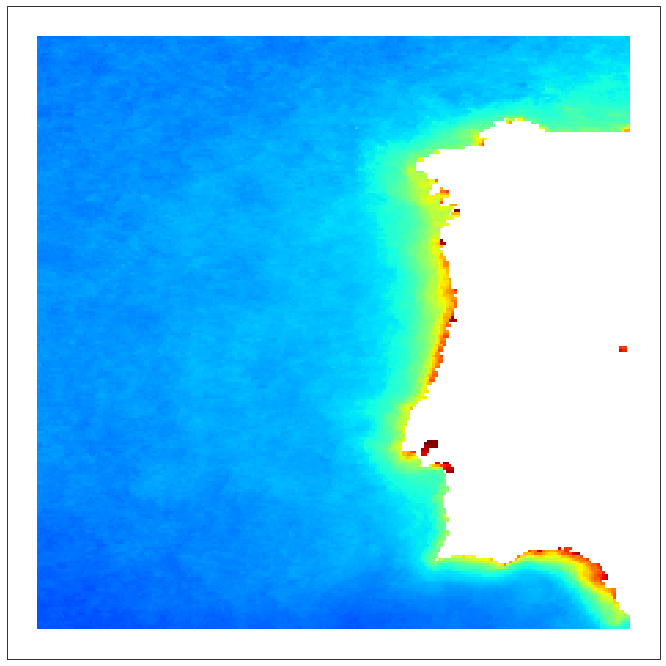

In [10]:
plt.figure(figsize=(12,12)) #create the figure
map = plt.axes(projection=cartopy.crs.PlateCarree()) # Choose the geographic projection, here we use PlateCarree
f1 = map.pcolormesh(lon, lat, np.log10(chl_winter), vmin=np.log10(0.1), # log10 the data for better visualization
                    vmax=np.log10(10), cmap=plt.cm.jet) #choosing the colormap

There are several things missing. We can improve how this image looks using Cartopy.

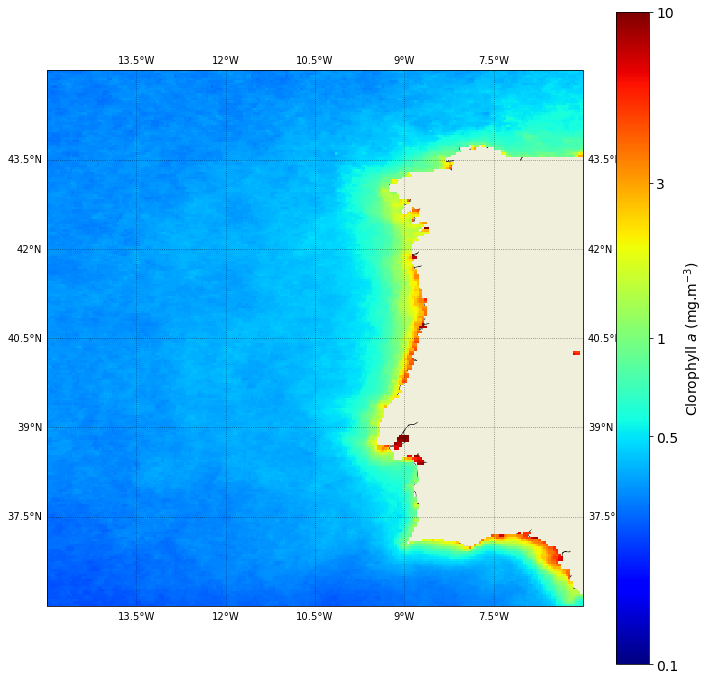

In [11]:
plt.figure(figsize=(12,12))
map = plt.axes(projection=cartopy.crs.PlateCarree())
map.coastlines(resolution='10m', color='black', linewidth=1) #add a coastline
map.set_extent([-15, -6, 36, 45]) # set the extent of the map to avoid blank spaces
map.add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land', #add different color to land
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = map.pcolormesh(lon, lat, np.log10(chl_winter), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = map.gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black') # Add gridlines
plt.xticks(fontsize=14) #increase size of ticks
plt.yticks(fontsize=14)
cbar = plt.colorbar(f1, ticks=[np.log10(0.1), np.log10(0.5), np.log10(1), np.log10(3), np.log10(10)]) #add a colorbar
cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Clorophyll $\it{a}$ (mg.m$^{-3}$)', fontsize=14) #add a label to the colorbar

## Now let's load the remaining images (Spring, Summer, Autumn)

In [12]:
# Spring image
file = 'chl_spring_19982020.nc' #write the name of the file
chl_spring19982020 = nc4.Dataset(file, mode='r') #open the file in python
chl_spring = np.array(chl_spring19982020['Chl-a'])
# Summer image
file = 'chl_summer_19982020.nc' #write the name of the file
chl_summer19982020 = nc4.Dataset(file, mode='r') #open the file in python
chl_summer = np.array(chl_summer19982020['Chl-a'])
# Autumn image
file = 'chl_autumn_19982020.nc' #write the name of the file
chl_autumn19982020 = nc4.Dataset(file, mode='r') #open the file in python
chl_autumn = np.array(chl_autumn19982020['Chl-a'])

C:\Users\afons\AppData\Local\Temp/ipykernel_7144/2814284135.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chl_spring = np.array(chl_spring19982020['Chl-a'])
C:\Users\afons\AppData\Local\Temp/ipykernel_7144/2814284135.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chl_summer = np.array(chl_summer19982020['Chl-a'])
C:\Users\afons\AppData\L

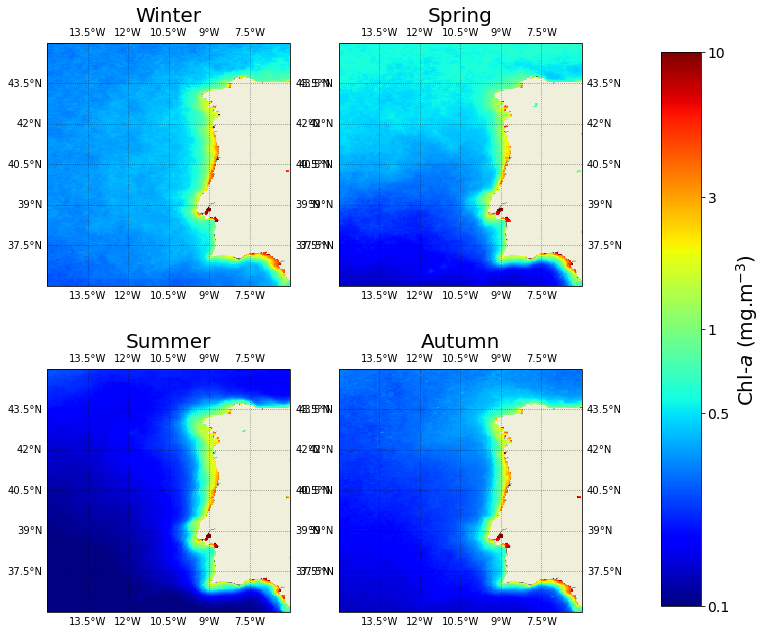

In [13]:
## Let's plot them together this time!
fig, axs = plt.subplots(nrows=2,ncols=2, #Creates a 2x2 subplots figure
                        subplot_kw={'projection': cartopy.crs.PlateCarree()}, #define projection
                        figsize=(11,11)) # Define the size of the figure

# Plot First Subplot - Winter
axs[0,0].coastlines(resolution='10m', color='black', linewidth=1)
axs[0,0].set_extent([-15, -6, 36, 45])
axs[0,0].add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land',
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = axs[0,0].pcolormesh(lon, lat, np.log10(chl_winter), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = axs[0,0].gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black')
axs[0,0].set_title('Winter', fontsize=20)
# Spring
axs[0,1].coastlines(resolution='10m', color='black', linewidth=1)
axs[0,1].set_extent([-15, -6, 36, 45])
axs[0,1].add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land',
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = axs[0,1].pcolormesh(lon, lat, np.log10(chl_spring), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = axs[0,1].gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black')
axs[0,1].set_title('Spring', fontsize=20)
# Summer
axs[1,0].coastlines(resolution='10m', color='black', linewidth=1)
axs[1,0].set_extent([-15, -6, 36, 45])
axs[1,0].add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land',
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = axs[1,0].pcolormesh(lon, lat, np.log10(chl_summer), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = axs[1,0].gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black')
axs[1,0].set_title('Summer', fontsize=20)
# Autumn
axs[1,1].coastlines(resolution='10m', color='black', linewidth=1)
axs[1,1].set_extent([-15, -6, 36, 45])
axs[1,1].add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land',
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = axs[1,1].pcolormesh(lon, lat, np.log10(chl_autumn), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = axs[1,1].gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black')
axs[1,1].set_title('Autumn', fontsize=20)
# Now, let's add a "giant" colorbar right to our subplots
fig.subplots_adjust(right=0.8) 
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(f1, cax=cbar_ax, ticks=[np.log10(0.1), np.log10(0.5), np.log10(1), np.log10(3), np.log10(10)])
cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Chl-$\it{a}$ (mg.m$^{-3}$)', fontsize=20)

## Now, how do we compare each image using basic statistics?

### We have to convert the information to 1 dimension again.

In [14]:
# Converting Winter image to 1D
Winter_1D = chl_winter.ravel()
print(Winter_1D) # print vector
print(Winter_1D.shape) # print shape - let us know how many dimensions the data has and how long each of them is
# Converting Summer image to 1D
Summer_1D = chl_summer.ravel()

[0.29858398 0.29370117 0.3112793  ... 0.62060547 0.60546875 0.5810547 ]
(46656,)


([<matplotlib.axis.XTick at 0x2462bdc69a0>,
 [Text(1, 0, 'Winter'), Text(2, 0, 'Summer')])

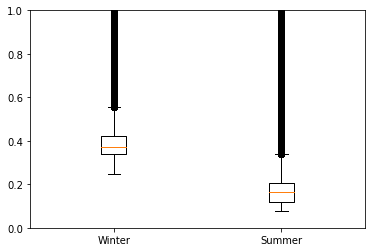

In [15]:
# Comparing the Winter and Summer Chl-a for the entire image
# Always remember to remove the missing values!
# np.isnan() identifies the missing values
# if we wanted to keep only the missing values, then we would want Winter_1D[np.isnan(Winter_1D)]
# The ~ before the np.isnan() does the opposite, we exclude the missing values!
plt.boxplot([Winter_1D[~np.isnan(Winter_1D)], Summer_1D[~np.isnan(Summer_1D)]]) #remeber to take out the missing values!
plt.ylim(0, 1)
plt.xticks(ticks=[1,2], labels=['Winter', 'Summer'])

### We can also choose a subset to compare instead of comparing the entire image
### For instance, let's choose the first 100 pixels in the upper left corner of the image (in the northern oceanic waters) and just compare those!

Note that both latitude and longitude have 216 pixels in lenght
Thus, we want the first 10 from each (10 x 10 = 100)!

If you remember, our chlorophyll-a data for each season has the following dimensions: Lat X Lon (216 X 216)

In [25]:
print(lat[0:10])
print(lon[0:10])
chl_winter_subset = chl_winter[0:10, 0:10]
chl_winter_subset_1D = chl_winter_subset.ravel()
chl_winter_subset.shape
#np.dim(chl_winter_subset)
print(chl_winter_subset)

[44.979168 44.9375   44.895832 44.854168 44.8125   44.770832 44.729168
 44.6875   44.645832 44.604168]
[-14.979167 -14.9375   -14.895833 -14.854167 -14.8125   -14.770833
 -14.729167 -14.6875   -14.645833 -14.604167]
[[0.29858398 0.29370117 0.3112793  0.3112793  0.30688477 0.30664062
  0.30664062 0.30615234 0.30297852 0.30419922]
 [0.32373047 0.31347656 0.31347656 0.3173828  0.3083496  0.3334961
  0.3334961  0.32250977 0.3178711  0.3178711 ]
 [0.3269043  0.31762695 0.31762695 0.3034668  0.3095703  0.3095703
  0.31835938 0.3239746  0.32055664 0.32055664]
 [0.3269043  0.3059082  0.30151367 0.30151367 0.29711914 0.3166504
  0.3166504  0.32373047 0.32788086 0.3359375 ]
 [0.32177734 0.31298828 0.31298828 0.30981445 0.32250977 0.33203125
  0.33203125 0.34399414 0.33251953 0.33251953]
 [0.31103516 0.33032227 0.32250977 0.32250977 0.31396484 0.31835938
  0.34448242 0.34448242 0.3540039  0.33764648]
 [0.3203125  0.3071289  0.29077148 0.29077148 0.3154297  0.31860352
  0.31860352 0.33081055 0.341

In [22]:
lat[-5]

36.1875

We can use matplotlib options to improve our plot.

In [ ]:
chl_summer_subset = chl_summer[0:10, 0:10]
chl_summer_subset_1D = chl_summer_subset.ravel()
chl_spring_subset = chl_spring[0:10, 0:10]
chl_spring_subset_1D = chl_spring_subset.ravel()
chl_autumn_subset = chl_autumn[0:10, 0:10]
chl_autumn_subset_1D = chl_autumn_subset.ravel()
#Comparing Seasons Chl-a for our new subset!
plt.boxplot([chl_winter_subset_1D, chl_spring_subset_1D, chl_summer_subset_1D, chl_autumn_subset_1D])
#plt.ylim(0, 1)
plt.xticks(ticks=[1,2,3,4], labels=['Winter', 'Spring', 'Summer', 'Autumn'])